# Data Science 101
## [Classifier Models](https://scikit-learn.org/stable/modules/tree.html#classification)

We'll use [scikit-learn](https://scikit-learn.org/stable/) to create a model that classifies some data (just created randomly) into 3 classes. This will be a good mockup of our cGMP datasets for the biosciences.

A classifier model separates 2 or more classes. For example, the blue and red lines below separate the filled circles from the empty circles. Each line would be a unique classifier (some are better than others as you can see).

![classifier image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/1024px-Svm_separating_hyperplanes.png)

In [1]:
import numpy as np
import pandas as pd

import csv

In [2]:
import sklearn   # %pip install scikit-learn

In [3]:
from sklearn.datasets import make_classification

## Create some data for a classification model

`scikit-learn` has a nice helper function to generate classification datasets. We'll use this to create our toy dataset. There will be 3 classes and 8 features (variables).

In [4]:
np.random.seed(816)  # Make sure we get the same random sequence whenever we run it

In [5]:
X, Y = make_classification(n_samples=605923, n_features=8, n_classes=3, n_informative=5)

## Put the data into a DataFrame

DataFrames make it easy to organize and massage our datasets. 

In [6]:
feature_names = np.array(
    [
        "pH",
        "concentration (μg/ml)",
        "molarity (mol/L)",
        "temperature (°C)",
        "lipophilicity",
        "volume (ml)",
        "turbidity (NTU)",
        "elapsed time (secs)",
    ]
)

df = pd.DataFrame(X, columns=feature_names)

In [7]:
df.head(5)

,pH,concentration (μg/ml),molarity (mol/L),temperature (°C),lipophilicity,volume (ml),turbidity (NTU),elapsed time (secs)
0,0.725232,1.945323,-1.430745,-1.478135,-1.881911,2.051609,-0.437596,-1.738268
1,1.177159,1.386740,-1.742781,1.535979,-2.805019,-4.131702,0.595392,0.132199
2,0.390952,-0.892718,-0.377981,0.032222,1.035891,0.472194,0.548471,0.350795
3,-0.235868,1.776299,-0.150960,-0.686130,-1.907406,-2.756324,-0.596668,-1.010278
4,0.657548,0.003453,1.185180,-0.189665,-0.302958,-1.250753,-0.042773,-0.540640


### Scale and shift to make the data seem realistic

I'm just randomly chosing values to scale and shift the data so that the values "make sense" for the parameter they represent. For example, concentrations and elapsed time should be positive numbers.

In [8]:
# Add the minimum value to everything but the 3rd column (temperature)
# This makes those values all positive numbers.
for column in feature_names[np.arange(len(feature_names)) != 3]:
    df[column] += abs(df[column].min())

# It's random data so let's just get it
#       looking correctly for the feature
df["temperature (°C)"] *= 10
df["temperature (°C)"] += 5.4
df["volume (ml)"] *= 1e4
df["concentration (μg/ml)"] /= 1e4
df["elapsed time (secs)"] += 227
df["elapsed time (secs)"] *= 10

In [9]:
df

,pH,concentration (μg/ml),molarity (mol/L),temperature (°C),lipophilicity,volume (ml),turbidity (NTU),elapsed time (secs)
0,5.744047,0.000787,5.234648,-9.381354,12.528551,93655.444937,7.631413,2345.429022
1,6.195974,0.000732,4.922611,20.759788,11.605443,31822.339160,8.664401,2364.133690
2,5.409767,0.000504,6.287411,5.722223,15.446353,77861.300135,8.617480,2366.319655
3,4.782947,0.000771,6.514433,-1.461302,12.503056,45576.113138,7.472341,2352.708926
4,5.676364,0.000593,7.850572,3.503352,14.107504,60631.825191,8.026235,2357.405303
...,...,...,...,...,...,...,...,...
605918,6.331137,0.000859,6.351610,-8.360471,8.022953,81362.104250,9.834977,2305.514459
605919,5.127211,0.000445,7.143865,-0.092239,15.190061,57069.762130,9.665127,2353.064857
605920,6.676017,0.000845,6.818992,-2.759908,12.436351,67069.699844,6.266615,2355.959926
605921,3.071569,0.000594,6.693396,13.432805,14.681529,84802.051315,7.508070,2373.199376


### Pandas makes plotting lots of columns easy

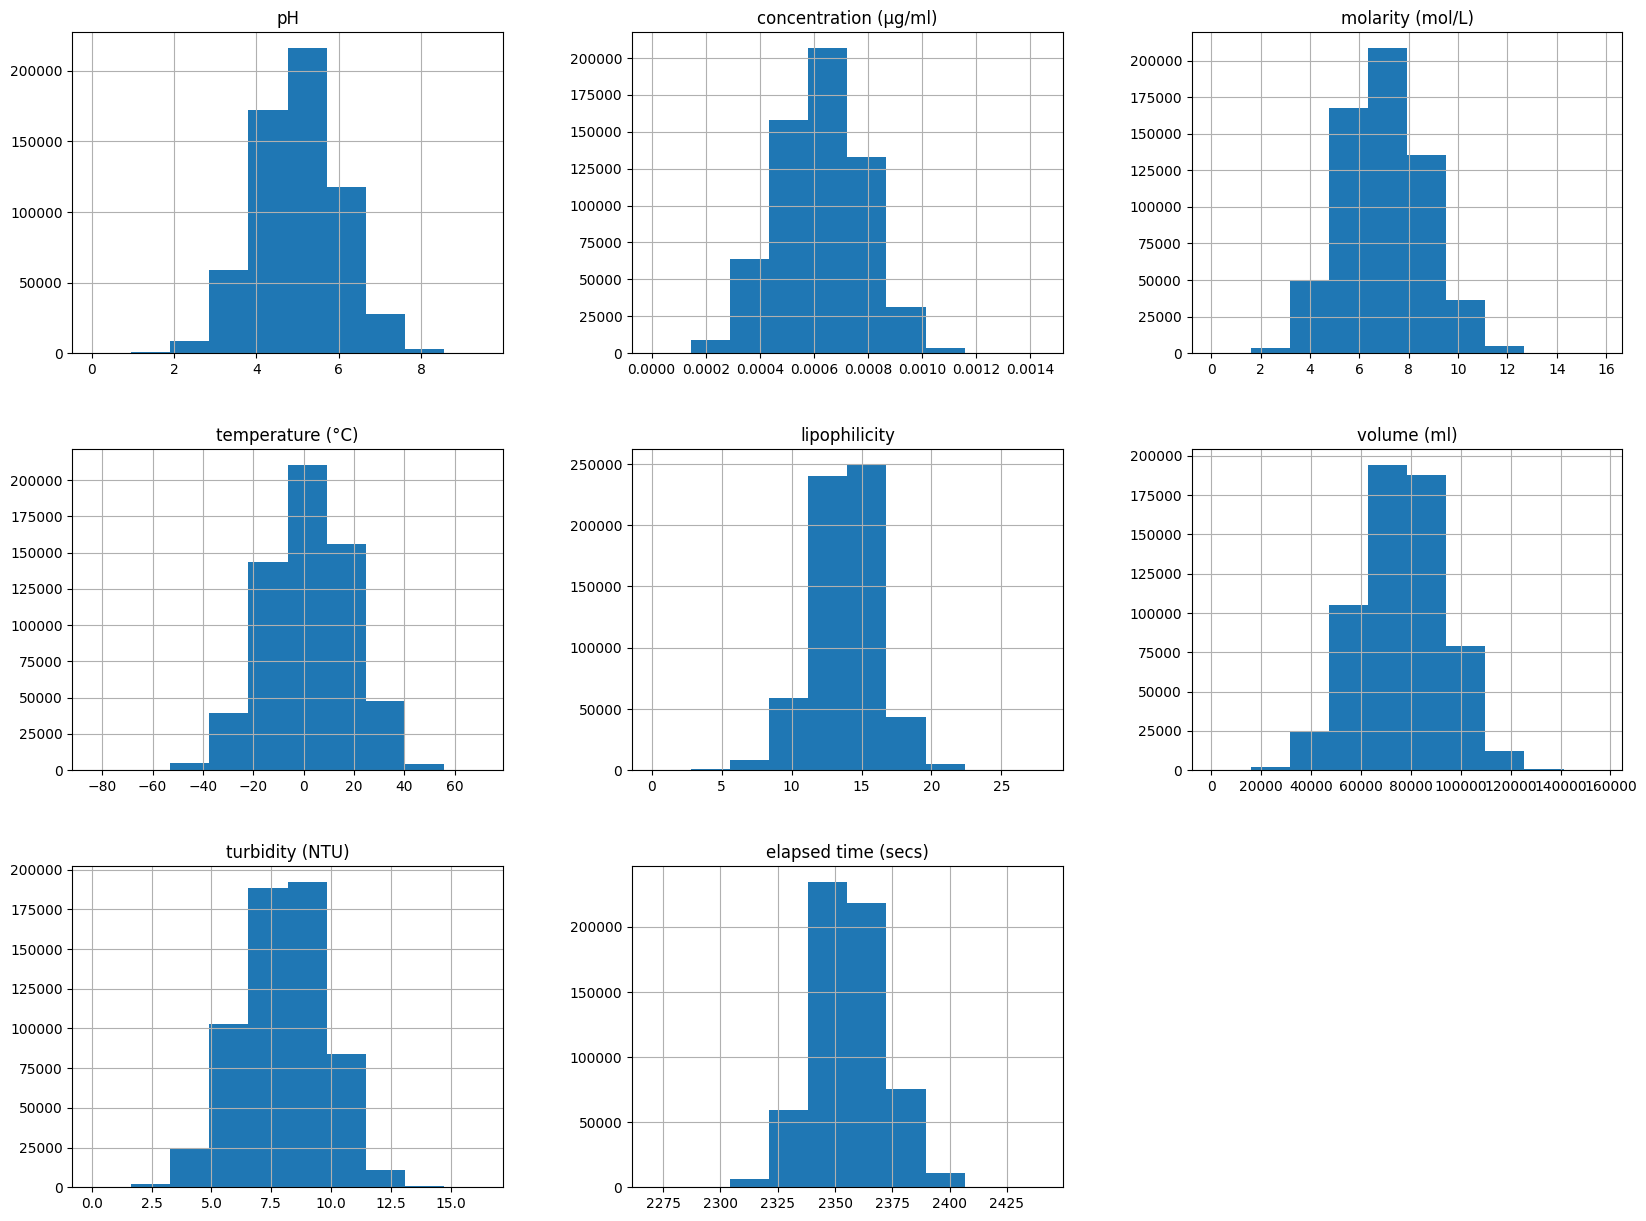

In [10]:
df.hist(figsize=(20,15));

In [11]:
df.describe()

,pH,concentration (μg/ml),molarity (mol/L),temperature (°C),lipophilicity,volume (ml),turbidity (NTU),elapsed time (secs)
count,605923.000000,605923.000000,605923.000000,605923.000000,605923.000000,605923.000000,605923.000000,605923.000000
mean,5.017745,0.000626,6.997431,2.089461,13.850906,76470.110018,8.006114,2356.158802
std,1.001131,0.000158,1.665213,16.492694,2.264557,17076.304671,1.781705,15.200348
min,0.000000,0.000000,0.000000,-84.096259,0.000000,0.000000,0.000000,2270.000000
25%,4.342642,0.000516,5.797549,-9.284253,12.506152,64699.857456,6.768615,2346.132154
50%,5.017004,0.000631,6.965851,2.122003,13.942072,76797.404903,8.064196,2355.513485
75%,5.692343,0.000737,8.143590,13.750541,15.292081,88355.852928,9.289894,2365.817968
max,9.513773,0.001448,15.863927,71.341922,27.976120,156922.597691,16.366807,2440.762676


## Add the classification label to the DataFrame

We'll call this `Antibody affinity` to make it seem realistic.

In [12]:
def class_name(value):
    """Assign a class name based on the value
    
    We've assume 3 classes (low, medium, and high)
    """

    if value == 0:
        return "Low"
    elif value == 1:
        return "Medium"
    else:
        return "High"

In [13]:
prediction_name = "Antibody affinity"
df[prediction_name] = list(map(class_name, Y))

In [14]:
df

,pH,concentration (μg/ml),molarity (mol/L),temperature (°C),lipophilicity,volume (ml),turbidity (NTU),elapsed time (secs),Antibody affinity
0,5.744047,0.000787,5.234648,-9.381354,12.528551,93655.444937,7.631413,2345.429022,Low
1,6.195974,0.000732,4.922611,20.759788,11.605443,31822.339160,8.664401,2364.133690,High
2,5.409767,0.000504,6.287411,5.722223,15.446353,77861.300135,8.617480,2366.319655,Low
3,4.782947,0.000771,6.514433,-1.461302,12.503056,45576.113138,7.472341,2352.708926,Medium
4,5.676364,0.000593,7.850572,3.503352,14.107504,60631.825191,8.026235,2357.405303,Medium
...,...,...,...,...,...,...,...,...,...
605918,6.331137,0.000859,6.351610,-8.360471,8.022953,81362.104250,9.834977,2305.514459,Medium
605919,5.127211,0.000445,7.143865,-0.092239,15.190061,57069.762130,9.665127,2353.064857,Medium
605920,6.676017,0.000845,6.818992,-2.759908,12.436351,67069.699844,6.266615,2355.959926,Medium
605921,3.071569,0.000594,6.693396,13.432805,14.681529,84802.051315,7.508070,2373.199376,Low


## Save the data to a CSV file

Realistically you'll get data as a CSV. In some cases, you'll have enough memory to load in the whole CSV. Nevertheless, I'll show how to create a data loader that will scale with whatever size dataset you use (and can be parallelized across compute).

In [15]:
csv_filename = "toy_cGMP_dataset.csv" 
df.to_csv(csv_filename, index=False)

In [16]:
!head -15 $csv_filename

pH,concentration (μg/ml),molarity (mol/L),temperature (°C),lipophilicity,volume (ml),turbidity (NTU),elapsed time (secs),Antibody affinity
5.744046917034562,0.0007874893859659413,5.234647589904735,-9.381354161554542,12.528550546588875,93655.44493728782,7.631412915799664,2345.429022336766,Low
6.195974069133236,0.0007316310797757877,4.9226113990165565,20.759787752823108,11.605442862909678,31822.339159810548,8.664400898822246,2364.1336895249647,High
5.409766788724181,0.0005036852507149984,6.287411437851176,5.722223439345846,15.446353001978782,77861.30013459167,8.61747954184812,2366.3196550277926,Low
4.7829470760548825,0.0007705869671046501,6.514432619808776,-1.4613023978987307,12.503055902615785,45576.11313756699,7.472340890764882,2352.708925680164,Medium
5.676363633556237,0.0005933024407799599,7.85057187038264,3.503351517122042,14.10750405510838,60631.825190692725,8.026235278506693,2357.405303106366,Medium
4.544998786858278,0.000788394916575371,5.481094500400836,-0.3232518740276795,13.75

In [17]:
# Size of the file
!du -h $csv_filename

90M	toy_cGMP_dataset.csv


## Let's create our own data loader

Data loaders are [generators](https://wiki.python.org/moin/Generators). Note the use of the `yield` command here. It allows the program execution to return to the line that called it and proceed. When the generator is called again, then it picks up where it left off. So it is giving us just one line at a time (or we can have it give us a few lines at a time).

Data loaders are great because they just load in a batch at a time. This allows us to work on massively-sized datasets. It also allows us to spread our compute over many computers if we want.

In [18]:
def get_data(filename):
    """Gets data from CSV"""
    
    with open(filename, "r") as csvfile:
        
        reader = csv.DictReader(csvfile)
        for row in reader:
            yield row
            

In [19]:
data_loader = get_data(csv_filename)

In [20]:
data_loader

<generator object get_data at 0x7f60b484ab90>

### First call gets us the first 5 lines of the CSV file

In [21]:
rows = []
for idx, row in enumerate(data_loader):
    
    print(row)
    rows.append(row["pH"])
    
    if idx >= 4:
        break

{'pH': '5.744046917034562', 'concentration (μg/ml)': '0.0007874893859659413', 'molarity (mol/L)': '5.234647589904735', 'temperature (°C)': '-9.381354161554542', 'lipophilicity': '12.528550546588875', 'volume (ml)': '93655.44493728782', 'turbidity (NTU)': '7.631412915799664', 'elapsed time (secs)': '2345.429022336766', 'Antibody affinity': 'Low'}
{'pH': '6.195974069133236', 'concentration (μg/ml)': '0.0007316310797757877', 'molarity (mol/L)': '4.9226113990165565', 'temperature (°C)': '20.759787752823108', 'lipophilicity': '11.605442862909678', 'volume (ml)': '31822.339159810548', 'turbidity (NTU)': '8.664400898822246', 'elapsed time (secs)': '2364.1336895249647', 'Antibody affinity': 'High'}
{'pH': '5.409766788724181', 'concentration (μg/ml)': '0.0005036852507149984', 'molarity (mol/L)': '6.287411437851176', 'temperature (°C)': '5.722223439345846', 'lipophilicity': '15.446353001978782', 'volume (ml)': '77861.30013459167', 'turbidity (NTU)': '8.61747954184812', 'elapsed time (secs)': '23

In [22]:
print(rows)

['5.744046917034562', '6.195974069133236', '5.409766788724181', '4.7829470760548825', '5.676363633556237']


#### Sanity check
Our values should be something like this

5.744046917034562,0.0007874893859659413,5.234647589904735,-9.381354161554542,12.528550546588875,93655.44493728782,7.631412915799664,2345.429022336766,Low
6.195974069133236,0.0007316310797757877,4.9226113990165565,20.759787752823108,11.605442862909678,31822.339159810548,8.664400898822246,2364.1336895249647,High
5.409766788724181,0.0005036852507149984,6.287411437851176,5.722223439345846,15.446353001978782,77861.30013459167,8.61747954184812,2366.3196550277926,Low
4.7829470760548825,0.0007705869671046501,6.514432619808776,-1.4613023978987307,12.503055902615785,45576.11313756699,7.472340890764882,2352.708925680164,Medium
5.676363633556237,0.0005933024407799599,7.85057187038264,3.503351517122042,14.10750405510838,60631.825190692725,8.026235278506693,2357.405303106366,Medium

In [23]:
!head -6 $csv_filename | tail -5   # 6 because we skip the header line

5.744046917034562,0.0007874893859659413,5.234647589904735,-9.381354161554542,12.528550546588875,93655.44493728782,7.631412915799664,2345.429022336766,Low
6.195974069133236,0.0007316310797757877,4.9226113990165565,20.759787752823108,11.605442862909678,31822.339159810548,8.664400898822246,2364.1336895249647,High
5.409766788724181,0.0005036852507149984,6.287411437851176,5.722223439345846,15.446353001978782,77861.30013459167,8.61747954184812,2366.3196550277926,Low
4.7829470760548825,0.0007705869671046501,6.514432619808776,-1.4613023978987307,12.503055902615785,45576.11313756699,7.472340890764882,2352.708925680164,Medium
5.676363633556237,0.0005933024407799599,7.85057187038264,3.503351517122042,14.10750405510838,60631.825190692725,8.026235278506693,2357.405303106366,Medium


### We can continue with other code if we want

In [24]:
a = 1
b = 2
c = a + b

print(c)

3


### Second call gets us the next 5 lines of the CSV file

In [25]:
rows = []
for idx, row in enumerate(data_loader):
    
    print(row)
    rows.append(row["pH"])
    
    if idx >= 4:
        break

{'pH': '4.544998786858278', 'concentration (μg/ml)': '0.000788394916575371', 'molarity (mol/L)': '5.481094500400836', 'temperature (°C)': '-0.3232518740276795', 'lipophilicity': '13.756432596856978', 'volume (ml)': '75680.8244571045', 'turbidity (NTU)': '6.369683833549491', 'elapsed time (secs)': '2367.8928694102597', 'Antibody affinity': 'Low'}
{'pH': '5.939616075448547', 'concentration (μg/ml)': '0.000814733582089522', 'molarity (mol/L)': '4.238695463345631', 'temperature (°C)': '-22.893694959643042', 'lipophilicity': '12.537542981404743', 'volume (ml)': '84508.73683900294', 'turbidity (NTU)': '8.064849605529005', 'elapsed time (secs)': '2335.52970504125', 'Antibody affinity': 'Low'}
{'pH': '6.365931660735418', 'concentration (μg/ml)': '0.00025506965375256827', 'molarity (mol/L)': '5.239360063963112', 'temperature (°C)': '-0.31268862746232884', 'lipophilicity': '17.42507153180413', 'volume (ml)': '116707.60469952963', 'turbidity (NTU)': '10.938264905364626', 'elapsed time (secs)': '2

In [26]:
print(rows)

['4.544998786858278', '5.939616075448547', '6.365931660735418', '4.2916408536519155', '5.110047833685457']


#### Sanity check
Our values should be something like this

4.544998786858278,0.000788394916575371,5.481094500400836,-0.3232518740276795,13.756432596856978,75680.8244571045,6.369683833549491,2367.8928694102597,Low
5.939616075448547,0.000814733582089522,4.238695463345631,-22.893694959643042,12.537542981404743,84508.73683900294,8.064849605529005,2335.52970504125,Low
6.365931660735418,0.00025506965375256827,5.239360063963112,-0.31268862746232884,17.42507153180413,116707.60469952963,10.938264905364626,2358.6339363457787,Low
4.2916408536519155,0.0008355366483480559,5.659683329326514,-34.3703583588642,12.151614876563121,108993.6407748543,7.807293129018748,2319.644261796635,High
5.110047833685457,0.00045482915795870565,8.738286940262444,-11.044930793268511,18.48034299250719,57767.68687060997,6.705757417135921,2375.774747843454,Medium

In [27]:
!head -11 $csv_filename | tail -5  # 11 because we skip the header line

4.544998786858278,0.000788394916575371,5.481094500400836,-0.3232518740276795,13.756432596856978,75680.8244571045,6.369683833549491,2367.8928694102597,Low
5.939616075448547,0.000814733582089522,4.238695463345631,-22.893694959643042,12.537542981404743,84508.73683900294,8.064849605529005,2335.52970504125,Low
6.365931660735418,0.00025506965375256827,5.239360063963112,-0.31268862746232884,17.42507153180413,116707.60469952963,10.938264905364626,2358.6339363457787,Low
4.2916408536519155,0.0008355366483480559,5.659683329326514,-34.3703583588642,12.151614876563121,108993.6407748543,7.807293129018748,2319.644261796635,High
5.110047833685457,0.00045482915795870565,8.738286940262444,-11.044930793268511,18.48034299250719,57767.68687060997,6.705757417135921,2375.774747843454,Medium


### Third call gets us the next 5 lines of the CSV file

In [28]:
rows = []
for idx, row in enumerate(data_loader):
    
    print(row)
    rows.append(row["pH"])
    
    if idx >= 4:
        break

{'pH': '6.255375702973213', 'concentration (μg/ml)': '0.0006433699724276163', 'molarity (mol/L)': '6.566685523150818', 'temperature (°C)': '23.285370120293912', 'lipophilicity': '13.743397149608523', 'volume (ml)': '70146.66696462227', 'turbidity (NTU)': '7.356433032722675', 'elapsed time (secs)': '2378.3104848155654', 'Antibody affinity': 'Low'}
{'pH': '6.4886355403658555', 'concentration (μg/ml)': '0.0008941176822537592', 'molarity (mol/L)': '5.3151589523319265', 'temperature (°C)': '-4.931340780069444', 'lipophilicity': '12.014525116717623', 'volume (ml)': '85771.32545141233', 'turbidity (NTU)': '6.38796320300999', 'elapsed time (secs)': '2353.971011396756', 'Antibody affinity': 'Low'}
{'pH': '4.169116090456363', 'concentration (μg/ml)': '0.001069513866748022', 'molarity (mol/L)': '5.5181141887624765', 'temperature (°C)': '4.3083429924285355', 'lipophilicity': '8.887489484952615', 'volume (ml)': '97022.48004700358', 'turbidity (NTU)': '5.931978315445862', 'elapsed time (secs)': '234

In [29]:
print(rows)

['6.255375702973213', '6.4886355403658555', '4.169116090456363', '5.508270912661684', '5.754263641061878']


#### Sanity check
Our values should be something like this

6.255375702973213,0.0006433699724276163,6.566685523150818,23.285370120293912,13.743397149608523,70146.66696462227,7.356433032722675,2378.3104848155654,Low
6.4886355403658555,0.0008941176822537592,5.3151589523319265,-4.931340780069444,12.014525116717623,85771.32545141233,6.38796320300999,2353.971011396756,Low
4.169116090456363,0.001069513866748022,5.5181141887624765,4.3083429924285355,8.887489484952615,97022.48004700358,5.931978315445862,2345.1603282859637,High
5.508270912661684,0.000402971248530904,5.717589700252887,0.9237256898221329,16.10430078903139,91111.09622313606,9.811913685680711,2359.5843874224684,Low
5.754263641061878,0.0005844853548741785,5.727444243408503,-6.781310265361496,14.304511492122353,75674.00466460997,8.975531032483827,2349.4343846434704,Low

In [30]:
!head -16 $csv_filename | tail -5  # 16 because we skip the header line

6.255375702973213,0.0006433699724276163,6.566685523150818,23.285370120293912,13.743397149608523,70146.66696462227,7.356433032722675,2378.3104848155654,Low
6.4886355403658555,0.0008941176822537592,5.3151589523319265,-4.931340780069444,12.014525116717623,85771.32545141233,6.38796320300999,2353.971011396756,Low
4.169116090456363,0.001069513866748022,5.5181141887624765,4.3083429924285355,8.887489484952615,97022.48004700358,5.931978315445862,2345.1603282859637,High
5.508270912661684,0.000402971248530904,5.717589700252887,0.9237256898221329,16.10430078903139,91111.09622313606,9.811913685680711,2359.5843874224684,Low
5.754263641061878,0.0005844853548741785,5.727444243408503,-6.781310265361496,14.304511492122353,75674.00466460997,8.975531032483827,2349.4343846434704,Low


## Putting it altogether

Let's get a data loader generator that grabs one batch at a time.

Note that although this data loader is specific to loading from a CSV we could easily add code to use the CSV data to load other files and then serve those to the generator. For example, our CSV could be a list of filenames and classes. 

```
filename,class type
path1/path2/image123.tif,dna
path3/image234.jpg,rna
image789.jpg,protein
...
path7/path8/path9/image999.jpg,antibody
```

We would just construct the `x_values` in the `yield` statement to be loaded images using the filenames from the CSV.

`x_values.append(load_image(row["filename"]))` where `load_image()` is our code for loading images based on the filename.

In [31]:
feature_names = np.array(
    [
        "pH",
        "concentration (μg/ml)",
        "molarity (mol/L)",
        "temperature (°C)",
        "lipophilicity",
        "volume (ml)",
        "turbidity (NTU)",
        "elapsed time (secs)",
    ]
)

prediction_name = "Antibody affinity"

In [32]:
class my_great_data_loader(object):
    """A data loader for our CSV files"""

    def __init__(
        self,
        filename: str,
        batch_size: int = 32,
        feature_names=feature_names,
        prediction_name:str=prediction_name,
        rows_to_use=None
    ):
        """Initializer. This is called once at the instantiation of the object

        Args:
            filename(str): Name of the csv file
            batch_size(int): Size of one batch (default=32 samples)
            feature_names(List[str]): List of strings
            prediction_name(str): The name of the column to predict
            rows_to_use: List of indexes to use (for train/test/validation)
        """

        self.filename = filename
        self.batch_size = batch_size
        self.total_rows = self.calculate_total_number_of_rows()
        self.total_num_batches = self.calculate_total_number_of_batches()
        self.feature_names = feature_names
        self.prediction_name = prediction_name
        
        # For train/test/validation splits we may want 
        #    to specify which rows are used
        if rows_to_use is None:
            self.rows_to_use = np.arange(self.total_rows)
        else:
            self.rows_to_use = rows_to_use
            
        self.current_row = 0

        self.reader = self.set_reader()

    def __iter__(self):
        return self

    def __next__(self):
        """Get next batch"""
        
        return self.get_next_batch()

    def __len__(self):
        """Return length of dataset (number of samples)"""
        return self.get_total_number_of_batches()

    def calculate_total_number_of_rows(self):
        """Gets the total number of rows in the data file"""

        row_count = 0

        # iterating through the whole file
        for row in open(self.filename, "r"):
            row_count += 1

        return row_count

    def get_batch_size(self):
        """Getter for batch size"""
        return self.batch_size

    def get_total_number_of_rows(self):
        """Getter function for total rows"""
        return self.total_rows
    
    def get_rows_to_use(self):
        """Getter function for rows to use"""
        return self.rows_to_use

    def calculate_total_number_of_batches(self):
        """Number of batches in our dataset"""

        return self.get_total_number_of_rows() // self.get_batch_size()

    def get_total_number_of_batches(self):
        """Getter function for number of total batches"""
        return self.total_num_batches

    def get_feature_names(self):
        """Getter function for feature names"""
        return self.feature_names
    
    def get_prediction_name(self):
        """Getter for prediction name"""
        return self.prediction_name
    
    def get_current_row(self):
        """Getter for current row"""
        return self.current_row
    
    def set_reader(self):
        """Set the csv reader"""

        csvfile = open(self.filename, "r")

        reader = csv.DictReader(csvfile)

        return reader

    def get_reader(self):
        """Get reader"""
        return self.reader
    
    def map_output(self, value:str):
        """Map to one hot encoding"""
        
        if value == "Low":
            return np.array([0.,0.,1.])
        elif value == "Medium":
            return np.array([0.,1.,0.])
        elif value == "High":
            return np.array([1.,0.,0.])
        else:
            raise Error(f"Class '{value}' not found")

    def get_next_batch(self):
        """Get next batch"""

        x_values = []
        y_values = []
        
        batch_id = 0
        
        while batch_id < self.get_batch_size():

            
            # Convert row (which is currently as dictionary into list)
            row = next(self.get_reader())

            if self.get_current_row() in self.get_rows_to_use():
                """
                Note: If our CSV file was referring to other files then
                we can load them here and serve them.
                For example, maybe the CSV file is:

                    filename,Antibody affinity
                    path1/path2/image123.tif,low
                    path3/image234.jpg,high
                    image789.jpg,medium
                    ...
                    path7/path8/path9/image999.jpg,low

                With this we can just load in the image files directly
                using the CSV row values. So this same code can
                be re-used for every type of dataset.

                """
                # Get everything but the last column
                values = []

                for feature in self.get_feature_names():
                    values.append(float(row[feature]))

                x_values.append(values)

                # Get the last column
                y_values.append(self.map_output(row[self.get_prediction_name()]))
                
                batch_id += 1
                
            self.current_row += 1

        yield (np.array(x_values), np.array(y_values))

In [33]:
data_loader2 = my_great_data_loader(
    filename=csv_filename, batch_size=5, feature_names=feature_names
)

### __len__()

The length command `len()` is actually the function we defined in `__len__()`!

In [34]:
len(data_loader2)

121184

In [35]:
data_loader2.get_total_number_of_rows()

605924

In [36]:
data_loader2.get_total_number_of_batches()

121184

In [37]:
data_loader2.get_feature_names()

array(['pH', 'concentration (μg/ml)', 'molarity (mol/L)',
       'temperature (°C)', 'lipophilicity', 'volume (ml)',
       'turbidity (NTU)', 'elapsed time (secs)'], dtype='<U21')

In [38]:
for x, y in next(data_loader2):

    print(f"{data_loader2.get_feature_names()} values = {x}")
    print(f"X Shape = {x.shape}\n\n")

    print(f"{data_loader2.get_prediction_name()} values = {y}")
    print(f"y Shape = {y.shape}\n\n")

['pH' 'concentration (μg/ml)' 'molarity (mol/L)' 'temperature (°C)'
 'lipophilicity' 'volume (ml)' 'turbidity (NTU)' 'elapsed time (secs)'] values = [[ 5.74404692e+00  7.87489386e-04  5.23464759e+00 -9.38135416e+00
   1.25285505e+01  9.36554449e+04  7.63141292e+00  2.34542902e+03]
 [ 6.19597407e+00  7.31631080e-04  4.92261140e+00  2.07597878e+01
   1.16054429e+01  3.18223392e+04  8.66440090e+00  2.36413369e+03]
 [ 5.40976679e+00  5.03685251e-04  6.28741144e+00  5.72222344e+00
   1.54463530e+01  7.78613001e+04  8.61747954e+00  2.36631966e+03]
 [ 4.78294708e+00  7.70586967e-04  6.51443262e+00 -1.46130240e+00
   1.25030559e+01  4.55761131e+04  7.47234089e+00  2.35270893e+03]
 [ 5.67636363e+00  5.93302441e-04  7.85057187e+00  3.50335152e+00
   1.41075041e+01  6.06318252e+04  8.02623528e+00  2.35740530e+03]]
X Shape = (5, 8)


Antibody affinity values = [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
y Shape = (5, 3)




In [39]:
for x, y in next(data_loader2):

    print(f"{data_loader2.get_feature_names()} values = {x}")
    print(f"X Shape = {x.shape}\n\n")

    print(f"{data_loader2.get_prediction_name()} values = {y}")
    print(f"y Shape = {y.shape}\n\n")

['pH' 'concentration (μg/ml)' 'molarity (mol/L)' 'temperature (°C)'
 'lipophilicity' 'volume (ml)' 'turbidity (NTU)' 'elapsed time (secs)'] values = [[ 4.54499879e+00  7.88394917e-04  5.48109450e+00 -3.23251874e-01
   1.37564326e+01  7.56808245e+04  6.36968383e+00  2.36789287e+03]
 [ 5.93961608e+00  8.14733582e-04  4.23869546e+00 -2.28936950e+01
   1.25375430e+01  8.45087368e+04  8.06484961e+00  2.33552971e+03]
 [ 6.36593166e+00  2.55069654e-04  5.23936006e+00 -3.12688627e-01
   1.74250715e+01  1.16707605e+05  1.09382649e+01  2.35863394e+03]
 [ 4.29164085e+00  8.35536648e-04  5.65968333e+00 -3.43703584e+01
   1.21516149e+01  1.08993641e+05  7.80729313e+00  2.31964426e+03]
 [ 5.11004783e+00  4.54829158e-04  8.73828694e+00 -1.10449308e+01
   1.84803430e+01  5.77676869e+04  6.70575742e+00  2.37577475e+03]]
X Shape = (5, 8)


Antibody affinity values = [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
y Shape = (5, 3)




In [40]:
for x, y in next(data_loader2):

    print(f"{data_loader2.get_feature_names()} values = {x}")
    print(f"X Shape = {x.shape}\n\n")

    print(f"{data_loader2.get_prediction_name()} values = {y}")
    print(f"y Shape = {y.shape}\n\n")

['pH' 'concentration (μg/ml)' 'molarity (mol/L)' 'temperature (°C)'
 'lipophilicity' 'volume (ml)' 'turbidity (NTU)' 'elapsed time (secs)'] values = [[ 6.25537570e+00  6.43369972e-04  6.56668552e+00  2.32853701e+01
   1.37433971e+01  7.01466670e+04  7.35643303e+00  2.37831048e+03]
 [ 6.48863554e+00  8.94117682e-04  5.31515895e+00 -4.93134078e+00
   1.20145251e+01  8.57713255e+04  6.38796320e+00  2.35397101e+03]
 [ 4.16911609e+00  1.06951387e-03  5.51811419e+00  4.30834299e+00
   8.88748948e+00  9.70224800e+04  5.93197832e+00  2.34516033e+03]
 [ 5.50827091e+00  4.02971249e-04  5.71758970e+00  9.23725690e-01
   1.61043008e+01  9.11110962e+04  9.81191369e+00  2.35958439e+03]
 [ 5.75426364e+00  5.84485355e-04  5.72744424e+00 -6.78131027e+00
   1.43045115e+01  7.56740047e+04  8.97553103e+00  2.34943438e+03]]
X Shape = (5, 8)


Antibody affinity values = [[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
y Shape = (5, 3)




### We can even get a data loader with just some of our features

In [41]:
data_loader3 = my_great_data_loader(
    filename=csv_filename, batch_size=5, feature_names=["pH", "turbidity (NTU)"]
)

In [42]:
data_loader3.get_feature_names()

['pH', 'turbidity (NTU)']

In [43]:
for x, y in next(data_loader3):

    print(f"{data_loader3.get_feature_names()} values = {x}")
    print(f"X Shape = {x.shape}\n\n")

    print(f"{data_loader3.get_prediction_name()} values = {y}")
    print(f"y Shape = {y.shape}\n\n")

['pH', 'turbidity (NTU)'] values = [[5.74404692 7.63141292]
 [6.19597407 8.6644009 ]
 [5.40976679 8.61747954]
 [4.78294708 7.47234089]
 [5.67636363 8.02623528]]
X Shape = (5, 2)


Antibody affinity values = [[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
y Shape = (5, 3)




In [44]:
data_loader4 = my_great_data_loader(
    filename=csv_filename,
    batch_size=5,
    feature_names=["pH", "turbidity (NTU)"],
    rows_to_use=[14, 223, 1234, 2222, 20222, 45123, 83456],
)

In [45]:
for x, y in next(data_loader4):

    print(f"{data_loader4.get_feature_names()} values = {x}")
    print(f"X Shape = {x.shape}\n\n")

    print(f"{data_loader4.get_prediction_name()} values = {y}")
    print(f"y Shape = {y.shape}\n\n")

['pH', 'turbidity (NTU)'] values = [[5.75426364 8.97553103]
 [6.65077974 2.21735753]
 [5.9008641  9.58502736]
 [3.39149966 7.6406676 ]
 [7.19851772 7.65204959]]
X Shape = (5, 2)


Antibody affinity values = [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
y Shape = (5, 3)




In [46]:
data_loader4.get_rows_to_use()

[14, 223, 1234, 2222, 20222, 45123, 83456]

### Let's do our own train/test/split of the data

To complete our data loader, we need to be able to [split the dataset](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) into 3 parts: a training set, a testing set, and a validation set. Usually the split is 80/10/10 (0.8/0.1/0.1). We'll do this by:

* creating lists of the indices
* randomizing that list
* split the list into 3 sections at the desired indices
* return the 3 lists (individually sorted)

NOTE: These lists are just the indices (row numbers) not the actual data

In [47]:
def get_splits(filename, train_test_split:float=0.8, test_validation_split:float=0.5):
    """Calculates the indices for the train/test/validation split
    
    Args:
        filename(str): The CSV filename
        train_test_split(float): Number from 0 to 1 (Default 0.8 which is 80% split)
        test_validation_split(float): Number from 0 to 1 (Default 0.5 which is 50% split)
    
    """

    # Make sure these are percentages
    assert train_test_split >= 0
    assert train_test_split <= 1
    assert test_validation_split >= 0
    assert test_validation_split <= 1
    
    total_rows = 0

    # iterating through the whole file
    for row in open(filename, "r"):
        total_rows += 1

    total_indicies = np.arange(total_rows)
    np.random.shuffle(total_indicies)  # Recall we already seeded so this should be deterministic

    last_train_idx = int(train_test_split * total_rows)

    train_rows = np.sort(total_indicies[:last_train_idx])
    remaining_rows = total_indicies[last_train_idx:]

    last_validation_idx = int(test_validation_split * len(remaining_rows))
    validation_rows = np.sort(remaining_rows[:last_validation_idx])
    test_rows = np.sort(remaining_rows[last_validation_idx:])
    
    return train_rows, test_rows, validation_rows

In [48]:
train_rows, test_rows, validation_rows = get_splits(csv_filename)

In [49]:
len(train_rows)

484739

In [50]:
len(test_rows)

60593

In [51]:
len(validation_rows)

60592

### If we did it correctly, then each list is unique

In [52]:
np.intersect1d(train_rows, test_rows)  # There should be no overlapping rows

array([], dtype=int64)

In [53]:
np.intersect1d(validation_rows, test_rows)  # There should be no overlapping rows

array([], dtype=int64)

In [54]:
np.intersect1d(train_rows, validation_rows)  # There should be no overlapping rows

array([], dtype=int64)

### Finally we can create 3 separate data loaders

One for training data, one for testing data, and one for validation data

In [55]:
train_loader = my_great_data_loader(
    filename=csv_filename,
    batch_size=32,
    rows_to_use=train_rows,
)

In [56]:
test_loader = my_great_data_loader(
    filename=csv_filename,
    batch_size=32,
    rows_to_use=test_rows,
)

In [57]:
validation_loader = my_great_data_loader(
    filename=csv_filename,
    batch_size=32,
    rows_to_use=validation_rows,
)

In [58]:
for x, y in next(train_loader):

    print(f"{train_loader.get_feature_names()} values = {x}")
    print(f"X Shape = {x.shape}\n\n")

    print(f"{train_loader.get_prediction_name()} values = {y}")
    print(f"y Shape = {y.shape}\n\n")

['pH' 'concentration (μg/ml)' 'molarity (mol/L)' 'temperature (°C)'
 'lipophilicity' 'volume (ml)' 'turbidity (NTU)' 'elapsed time (secs)'] values = [[ 5.74404692e+00  7.87489386e-04  5.23464759e+00 -9.38135416e+00
   1.25285505e+01  9.36554449e+04  7.63141292e+00  2.34542902e+03]
 [ 6.19597407e+00  7.31631080e-04  4.92261140e+00  2.07597878e+01
   1.16054429e+01  3.18223392e+04  8.66440090e+00  2.36413369e+03]
 [ 5.40976679e+00  5.03685251e-04  6.28741144e+00  5.72222344e+00
   1.54463530e+01  7.78613001e+04  8.61747954e+00  2.36631966e+03]
 [ 4.78294708e+00  7.70586967e-04  6.51443262e+00 -1.46130240e+00
   1.25030559e+01  4.55761131e+04  7.47234089e+00  2.35270893e+03]
 [ 5.67636363e+00  5.93302441e-04  7.85057187e+00  3.50335152e+00
   1.41075041e+01  6.06318252e+04  8.02623528e+00  2.35740530e+03]
 [ 4.54499879e+00  7.88394917e-04  5.48109450e+00 -3.23251874e-01
   1.37564326e+01  7.56808245e+04  6.36968383e+00  2.36789287e+03]
 [ 5.93961608e+00  8.14733582e-04  4.23869546e+00 -2.

In [59]:
len(train_loader)

18935